<a href="https://colab.research.google.com/github/rhiats/classification_CAD/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease**

In [1]:
pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
y = np.where(y > 0, 1, 0)
y = pd.DataFrame(y)

In [4]:
y.head()

,0
0,0
1,1
2,1
3,0
4,0


In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [7]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [8]:
list(heart_disease.variables['description'])

[None,
 None,
 None,
 'resting blood pressure (on admission to the hospital)',
 'serum cholestoral',
 'fasting blood sugar > 120 mg/dl',
 None,
 'maximum heart rate achieved',
 'exercise induced angina',
 'ST depression induced by exercise relative to rest',
 None,
 'number of major vessels (0-3) colored by flourosopy',
 None,
 'diagnosis of heart disease']

In [9]:
X = X[['age','sex','trestbps','chol','fbs','thalach','exang','oldpeak','ca']]

In [10]:
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca
0,63,1,145,233,1,150,0,2.3,0.0
1,67,1,160,286,0,108,1,1.5,3.0
2,67,1,120,229,0,129,1,2.6,2.0
3,37,1,130,250,0,187,0,3.5,0.0
4,41,0,130,204,0,172,0,1.4,0.0


In [11]:
df = X
df['y'] = y

<ipython-input-11-15da3679d863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = y


**Data Set Overview**

In [12]:
print(f"Numer of patients: {X.shape[0]}")

Numer of patients: 303


**Class Imbalance**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot
labels_cnt_df=df[['y','age']].groupby('y').count().reset_index().rename(columns={'age': 'Count'})
labels_cnt_df

,y,Count
0,0,164
1,1,139


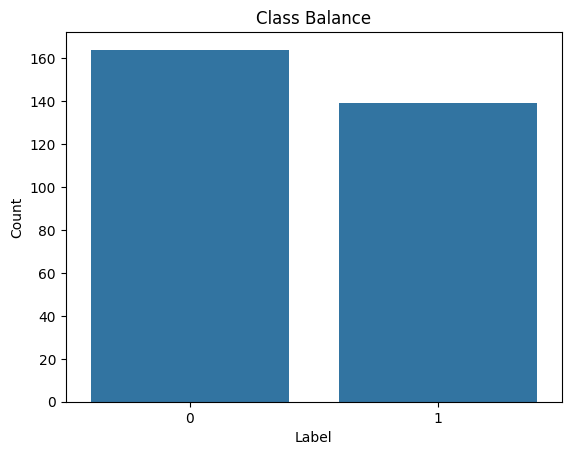

In [14]:
sns.barplot(data=labels_cnt_df, x='y', y='Count')

# Add labels and title
plt.title("Class Balance")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

**T-Test Function**

In [15]:
from scipy.stats import ttest_ind

# Example: Compare Continuous Feature between Healthy and CAD groups

def ttest(df,var_name):
  """
    Hypothesis Test of a T-Test to compare the means of the healthy
    and unhealthy patients.

    @p var_name: The name of the variable in the dataframe to test.
    @return: None
  """
  group1 = df[df['y'] == 0][var_name]  # Healthy
  group2 = df[df['y'] == 1][var_name]  # CAD

  t_stat, p_value = ttest_ind(group1, group2)
  print("t-statistic:", t_stat)
  print("p-value:", p_value)

  if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")

**Chi Square Test of Independence**

In [16]:
from scipy.stats import chi2_contingency

def chi_square_test(df,var_name):
  """
    Chi Square Test of Independence to compare the means of the healthy
    and unhealthy patients.

    @p var_name: The name of the variable in the dataframe to test.
    @return: None
  """
  # Step 1: Create a contingency table
  # (rows = sex, columns = heart disease status)
  contingency = pd.crosstab(df[var_name], df['y'])

  # Step 2: Perform the Chi-Square test
  chi2, p, dof, expected = chi2_contingency(contingency)

  # Step 3: Print results
  print("Chi-Square Statistic:", chi2)
  print("p-value:", p)
  print("Degrees of Freedom:", dof)
  #print("Expected Frequencies:\n", expected)
  if p < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the fequencies of the two groups.")

**Age Distribution by Class and T-Test**

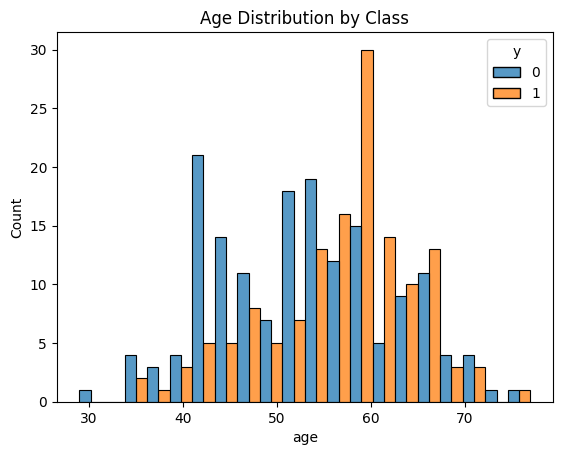

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='age', hue='y', multiple='dodge', bins=20)
plt.title('Age Distribution by Class')
plt.show()

In [18]:
CAD_patients_60s = df[(df['age'] >= 60) & (df['age'] < 70) & (df['y'] > 0)].shape[0]
Healthy_patients_60s = df[(df['age'] >= 60) & (df['age'] < 70)].shape[0]

print(f"Number of healthy patients between 60 and 70: {Healthy_patients_60s}")
print(f"Number of CAD patients between 60 and 70: {CAD_patients_60s}")
print(f"Percentage of healthy patients between 60 and 70: {Healthy_patients_60s / df.shape[0] * 100:.2f}%")

Number of healthy patients between 60 and 70: 81
Number of CAD patients between 60 and 70: 49
Percentage of healthy patients between 60 and 70: 26.73%


In [19]:
ttest(df,'age')

t-statistic: -3.971100226293655
p-value: 8.955636917529706e-05
Reject the null hypothesis. There is a significant difference between the means of the two groups.


**Sex Bar Graph**

In [20]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,y
0,63,1,145,233,1,150,0,2.3,0.0,0
1,67,1,160,286,0,108,1,1.5,3.0,1
2,67,1,120,229,0,129,1,2.6,2.0,1
3,37,1,130,250,0,187,0,3.5,0.0,0
4,41,0,130,204,0,172,0,1.4,0.0,0


In [21]:
#1 is male
gender_cnt_df=X[['sex','age']].groupby('sex').count().reset_index()
gender_cnt_df.rename(columns={'age': 'Count'}, inplace=True)
gender_cnt_df['Relative_Frequency'] = gender_cnt_df['Count'] / gender_cnt_df['Count'].sum()
gender_cnt_df

,sex,Count,Relative_Frequency
0,0,97,0.320132
1,1,206,0.679868


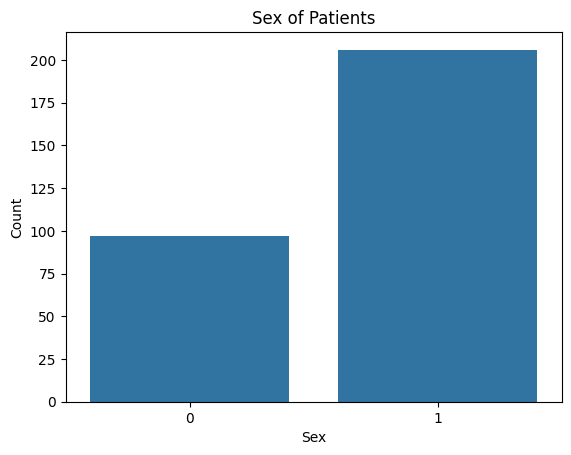

In [22]:
sns.barplot(data=gender_cnt_df, x='sex', y='Count')

# Add labels and title
plt.title("Sex of Patients")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

**Does heart disease (Yes/No) depend on sex (Male/Female)? Chi-Square Test of Independence**

In [23]:
chi_square_test(df,'sex')

Chi-Square Statistic: 22.042560606155472
p-value: 2.666712348180942e-06
Degrees of Freedom: 1
Reject the null hypothesis. There is a significant difference between the fequencies of the two groups.


**Resting Blood Pressure Distribution and T-Test**

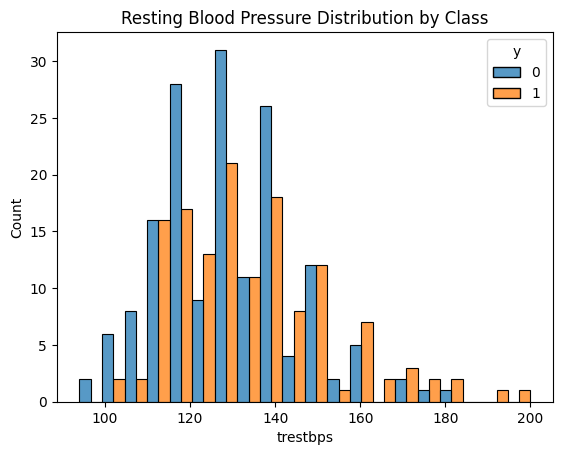

In [24]:
sns.histplot(data=df, x='trestbps', hue='y', multiple='dodge', bins=20)
plt.title('Resting Blood Pressure Distribution by Class')
plt.show()

In [25]:
ttest(df,'trestbps')

t-statistic: -2.647004396805282
p-value: 0.008548268928594928
Reject the null hypothesis. There is a significant difference between the means of the two groups.


In [26]:
#Conditional Probability that a person with a blood pressure greater than 140 had CAD
CAD_patients_with_high_bp = df[(df['trestbps'] > 140) & (df['y'] > 0)].shape[0]
Patients_with_high_bp = df[df['trestbps'] > 140].shape[0]

print(f"Number of healthy patients with high blood pressure: {Patients_with_high_bp}")
print(f"Number of CAD patients with high blood pressure: {CAD_patients_with_high_bp}")

print(f"Percentage of Patients with high blood pressure who have CAD: {CAD_patients_with_high_bp / Patients_with_high_bp * 100:.2f}%")

Number of healthy patients with high blood pressure: 66
Number of CAD patients with high blood pressure: 39
Percentage of Patients with high blood pressure who have CAD: 59.09%


**Cholesterol Distribution and T-Test**

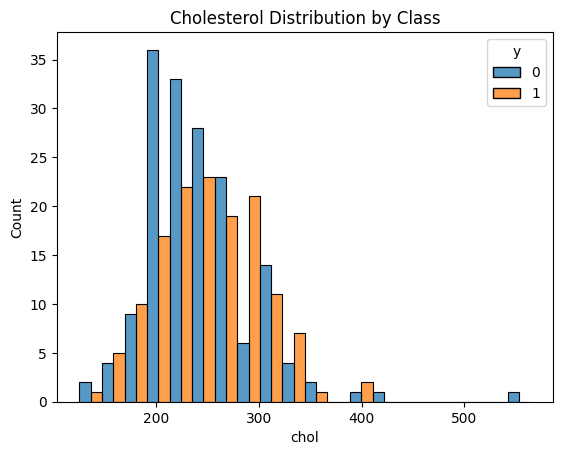

In [27]:
sns.histplot(data=df, x='chol', hue='y', multiple='dodge', bins=20)
plt.title('Cholesterol Distribution by Class')
plt.show()

In [28]:
ttest(df,'chol')

t-statistic: -1.4829209163941466
p-value: 0.13914167020436527


**Fasting Blood Sugar Bar Graph**

In [29]:
fs_bd_cnt_df=X[['fbs','age']].groupby('fbs').count().reset_index()
fs_bd_cnt_df.rename(columns={'age': 'Count'}, inplace=True)
fs_bd_cnt_df

,fbs,Count
0,0,258
1,1,45


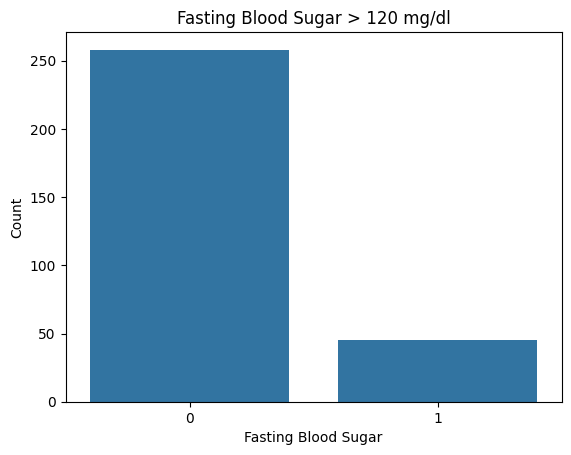

In [30]:
sns.barplot(data=fs_bd_cnt_df, x='fbs', y='Count')

# Add labels and title
plt.title("Fasting Blood Sugar > 120 mg/dl")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.show()

In [31]:
chi_square_test(df,'fbs')

Chi-Square Statistic: 0.07709504829488663
p-value: 0.7812734067063785
Degrees of Freedom: 1


**Exercise Induced Angina Bar Graph**

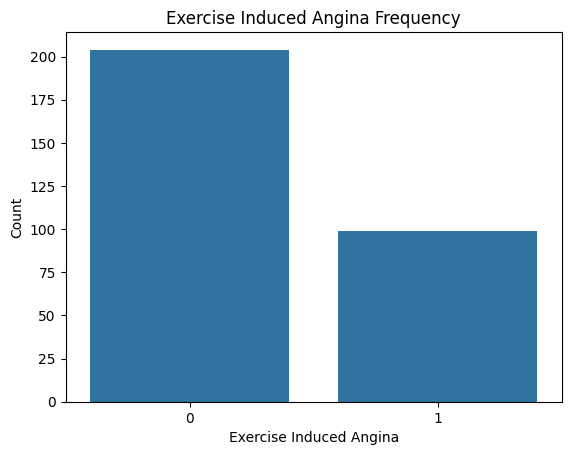

In [32]:
df_exang = X[['exang','age']].groupby('exang').count().reset_index()
df_exang.rename(columns={'age': 'Count'}, inplace=True)

sns.barplot(data=df_exang, x='exang', y='Count')

# Add labels and title
plt.title("Exercise Induced Angina Frequency")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.show()

In [33]:
chi_square_test(df,'exang')

Chi-Square Statistic: 54.68643453080239
p-value: 1.413788096718085e-13
Degrees of Freedom: 1
Reject the null hypothesis. There is a significant difference between the fequencies of the two groups.


**ST Depression Distribution and T-Test**

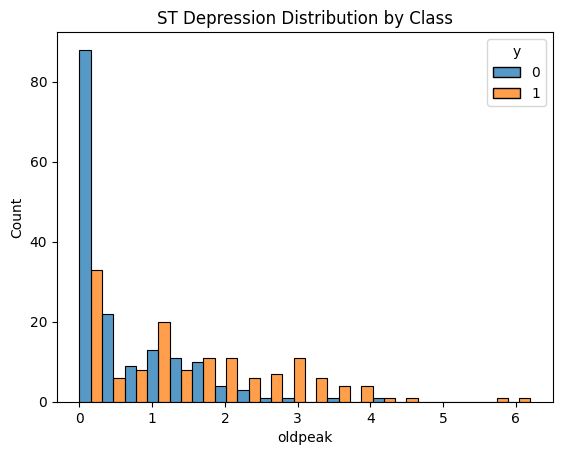

In [34]:
sns.histplot(data=df, x='oldpeak', hue='y', multiple='dodge', bins=20)
plt.title('ST Depression Distribution by Class')
plt.show()

In [35]:
ttest(df,'oldpeak')

t-statistic: -8.134292027638805
p-value: 1.0976053396984802e-14
Reject the null hypothesis. There is a significant difference between the means of the two groups.


**Bar Graph Number of Major Vessels Fluorescing**

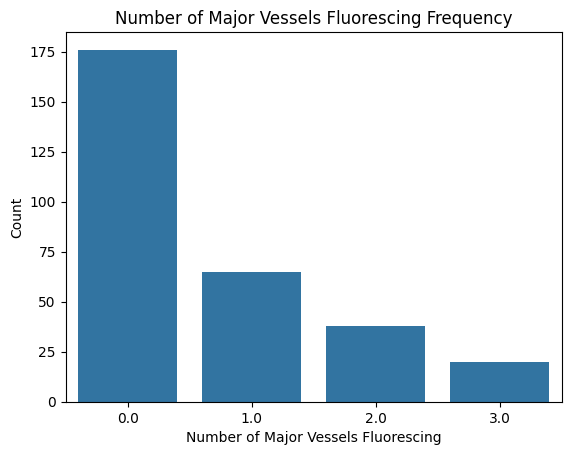

In [36]:
df_exang = df[['ca','age']].groupby('ca').count().reset_index()
df_exang.rename(columns={'age': 'Count'}, inplace=True)

sns.barplot(data=df_exang, x='ca', y='Count')

# Add labels and title
plt.title("Number of Major Vessels Fluorescing Frequency")
plt.xlabel("Number of Major Vessels Fluorescing")
plt.ylabel("Count")
plt.show()

In [37]:
chi_square_test(df,'ca')

Chi-Square Statistic: 71.84314194577351
p-value: 1.7199517696913475e-15
Degrees of Freedom: 3
Reject the null hypothesis. There is a significant difference between the fequencies of the two groups.


**Maximum Heart Rate Achieved Distribution**

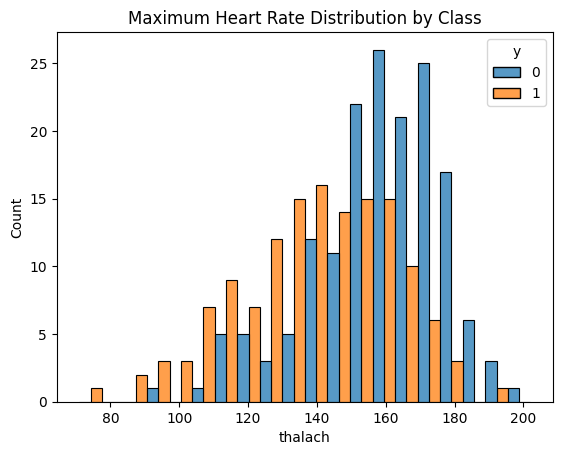

In [38]:
sns.histplot(data=df, x='thalach', hue='y', multiple='dodge', bins=20)
plt.title('Maximum Heart Rate Distribution by Class')
plt.show()

In [39]:
ttest(df,'thalach')

t-statistic: 7.9636186823270485
p-value: 3.456964908430172e-14
Reject the null hypothesis. There is a significant difference between the means of the two groups.


**Visualize Classes**

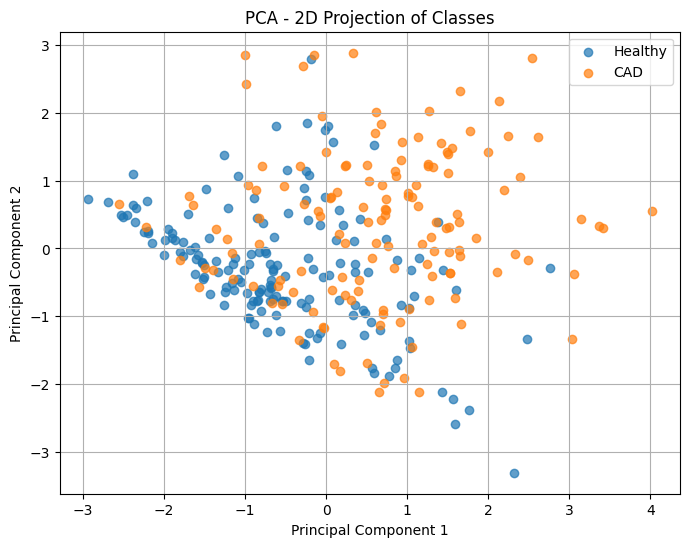

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = X[['age','trestbps','chol','exang','oldpeak']]
y_binary = np.where(y > 0, 1, 0)  # Ensure binary classes: 0 or 1
class_names = ['Healthy', 'CAD']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y_binary

# Plot
plt.figure(figsize=(8, 6))
for label in np.unique(y_binary):
    plt.scatter(df_pca[df_pca['label'] == label]['PC1'],
                df_pca[df_pca['label'] == label]['PC2'],
                label=class_names[label],
                alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection of Classes')
plt.legend()
plt.grid(True)
plt.show()

**Logistic Regression with Feature Selection**

**Linearly Separable Equation**

In [41]:
import numpy as np

df_subset = X[['age','trestbps','chol','exang','oldpeak']]
df_subset["y"] = y

# Assume X is (n_samples, n_features), y is (n_samples,)
class_0 = df_subset[df_subset["y"] == 0]
class_1 = df_subset[df_subset["y"] > 0]

centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

print("Centroid Class 0:", centroid_0)
print("Centroid Class 1:", centroid_1)

Centroid Class 0: age          52.585366
trestbps    129.250000
chol        242.640244
exang         0.140244
oldpeak       0.586585
y             0.000000
dtype: float64
Centroid Class 1: age          56.625899
trestbps    134.568345
chol        251.474820
exang         0.546763
oldpeak       1.574101
y             1.000000
dtype: float64


In [42]:
w = centroid_1 - centroid_0  # direction vector

In [43]:
midpoint = (centroid_0 + centroid_1) / 2  # midpoint is the decision boundary

In [44]:
print("Midpoint:", midpoint)
print("Direction vector (normal):", w)

Midpoint: age          54.605633
trestbps    131.909173
chol        247.057532
exang         0.343503
oldpeak       1.080343
y             0.500000
dtype: float64
Direction vector (normal): age         4.040533
trestbps    5.318345
chol        8.834576
exang       0.406519
oldpeak     0.987515
y           1.000000
dtype: float64


In [45]:
def predict_linear_separator(X, w, midpoint):
    projections = (df_subset - midpoint) @ w
    return (projections > 0).astype(int)  # class 1 if on centroid_1's side

y_pred = predict_linear_separator(df.drop(columns=['y'], axis=1), w, midpoint)

accuracy = np.mean(y_pred == df["y"])
print(f"Centroid-separator accuracy: {accuracy:.2f}")

Centroid-separator accuracy: 0.57


**Select Features, Scale, Train Test Split**

In [46]:
nan_counts = df.isna().sum()

print("NAN Count: \n\n",nan_counts)

df = df.dropna()

nan_counts = df.isna().sum()

print("NAN Count: \n\n",nan_counts)

NAN Count: 

 age         0
sex         0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
oldpeak     0
ca          4
y           0
dtype: int64
NAN Count: 

 age         0
sex         0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
oldpeak     0
ca          0
y           0
dtype: int64


In [47]:
X= df[['age','trestbps','oldpeak','ca','thalach']]
y = df['y']

X_scaled = (X - X.mean()) / X.std()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Nonlinear SVM (Kernel SVM)**

In [48]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.81


In [51]:
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.75


**Random Forest**

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)

In [53]:
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.77


In [54]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_random_forest).ravel()
specificity_rf = tn_rf / (tn_rf+fp_rf)
print(f"Specificity: {specificity_rf:.2f}")

Specificity: 0.81


In [55]:
sensitivity_rf = tp_rf / (tp_rf + fn_rf)
print(f"Sensitivity: {sensitivity_rf:.2f}")

Sensitivity: 0.71


**Multi-Layer Perceptron - A Deep Learning Model**

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

In [57]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(5, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [58]:
model = MLP()

In [59]:
criterion = nn.BCELoss() #Loss Function: Binary Cross Entropy between the target and the input probabilities

In [60]:
optimizer = optim.Adam(model.parameters(), lr=0.001) #Optimizer

In [62]:
# Convert DataFrame to a NumPy array
X_train_arr = X_train.to_numpy()

# Convert NumPy array to a PyTorch tensor
X_train_tensor = torch.from_numpy(X_train_arr)

In [64]:
X_train_tensor = X_train_tensor.float()

In [66]:
# Convert DataFrame to a NumPy array
y_train_arr = y_train.to_numpy()

# Convert NumPy array to a PyTorch tensor
y_train_tensor = torch.from_numpy(y_train_arr)

In [70]:
y_train_tensor = y_train_tensor.unsqueeze(1)

In [72]:
y_train_tensor = y_train_tensor.float()

In [74]:
# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation on train set
    with torch.no_grad():
        preds = (outputs > 0.5).float()
        acc = accuracy_score(y_train_arr, preds.numpy())

    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f} - Accuracy: {acc:.4f}")

torch.Size([239, 1])
torch.Size([239, 1])
Epoch 1/50 - Loss: 0.7154 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 2/50 - Loss: 0.7151 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 3/50 - Loss: 0.7149 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 4/50 - Loss: 0.7146 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 5/50 - Loss: 0.7143 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 6/50 - Loss: 0.7141 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 7/50 - Loss: 0.7138 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 8/50 - Loss: 0.7136 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 9/50 - Loss: 0.7134 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 10/50 - Loss: 0.7131 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])
Epoch 11/50 - Loss: 0.7129 - Accuracy: 0.4770
torch.Size([239, 1])
torch.Size([239, 1])

**ROC Curve**